# Imports

In [3]:
import sys; sys.path.insert(0, '..') # so that you can use relative paths ,  see https://stackoverflow.com/questions/34478398/import-local-function-from-a-module-housed-in-another-directory-with-relative-im

In [1]:
%load_ext autoreload
%autoreload 2

In [6]:
from src.furuta.data import *
from src.furuta.dynamics import *
from src.furuta.models import *
from src.furuta.train import *
from src.furuta.plots import *
from src.furuta.trajectories import *
from src.furuta.utils import *

# Generating the data

## Without dataloader

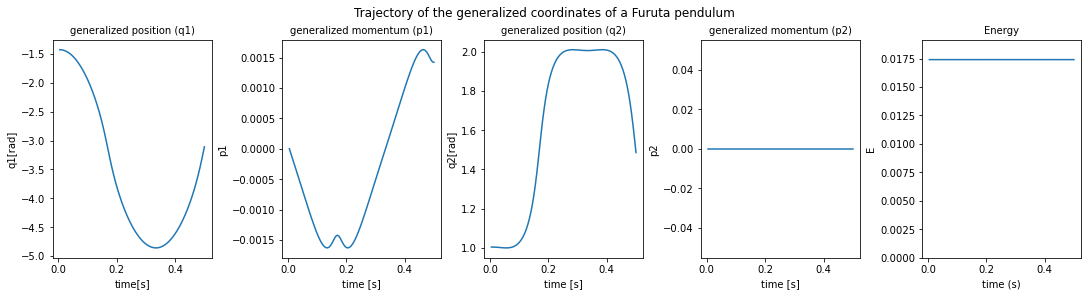

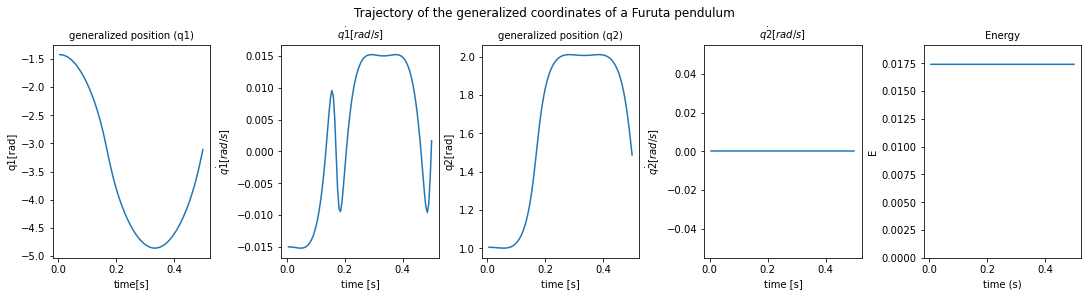

In [8]:
q1, p1, q2, p2, energy, derivatives, t_eval = multiple_trajectories_furuta(time_steps=100,
                                                                           num_trajectories=3,
                                                                           y0=None,
                                                                           noise_std=0.0, 
                                                                           u=0.0,C_q1=0.0, C_q2=0.0)

plot_traj_furuta(t_eval, q1[0,:], p1[0,:], q2[0,:], p2[0,:], energy[0,:],
                 title = 'Trajectory of the generalized coordinates of a Furuta pendulum')

plot_traj_furuta(t_eval, q1[0,:], derivatives[0,:,1], q2[0,:], derivatives[0,:,3], energy[0,:],
                 title = 'Trajectory of the generalized coordinates of a Furuta pendulum', coord_type='newtonian')

In [9]:
print(q1.shape) 
print(energy.shape)
print(derivatives.shape)
print(t_eval.shape)

torch.Size([3, 100])
torch.Size([3, 100])
torch.Size([3, 100, 4])
torch.Size([100])


## With dataloader

In [10]:
q1, p1, q2, p2, energy, derivatives, t_eval = multiple_trajectories_furuta(time_steps=300, 
                   num_trajectories=10, y0=None, noise_std=0.0, 
                   u=0.0,C_q1=0.0, C_q2=0.0)

train_loader, test_loader = data_loader_furuta(q1, p1, q2, p2, energy, derivatives, t_eval, batch_size=3,
                       shuffle = True, proportion = 0.5, coord_type='newtonian')

torch.Size([3, 4, 300])


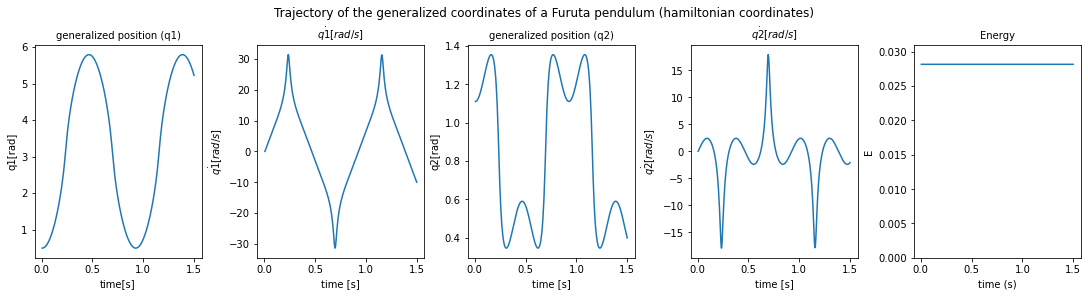

In [11]:
# sanity checks
x_tt, t_eval_tt = next(iter(train_loader))
print(x_tt.shape)

q1_t = x_tt[0,0,:]
p1_t = x_tt[0,1,:]
q2_t = x_tt[0,2,:]
p2_t = x_tt[0,3,:]

plot_traj_furuta(t_eval_tt[0], q1_t, p1_t, q2_t, p2_t,energy[0,:],
                 title = 'Trajectory of the generalized coordinates of a Furuta pendulum (hamiltonian coordinates)', coord_type='newtonian')